In [7]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

선형회귀 예측모델

The score of this line for the data:  0.903203123105647
[63.71244635 66.47353362]


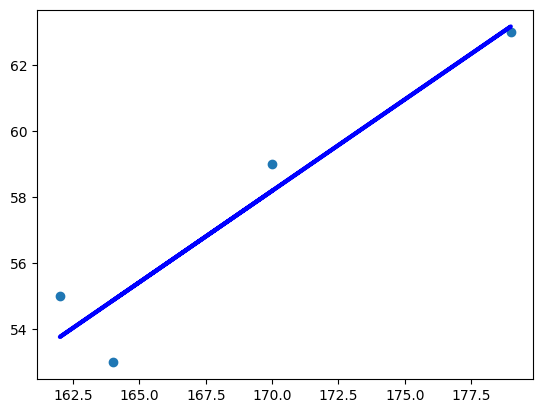

In [12]:
#선형회귀 모델 생성
regr = linear_model.LinearRegression()

#샘플데이터 선형회귀에 적용
X = [[164], [179], [162], [170]] #키 데이터
y = [53, 63, 55, 59] #몸무게 데이터
regr.fit(X, y)

#예측정도 확인
score = regr.score(X, y)
print("The score of this line for the data: ", score)

#예측하기
input_data = [[180], [185]] #새로 예측해 볼 데이터
result = regr.predict(input_data)
print(result)

#그래프 생성
plt.scatter(X, y)
y_pred = regr.predict(X)
plt.plot(X, y_pred, color = 'blue', linewidth = 3)
plt.show()

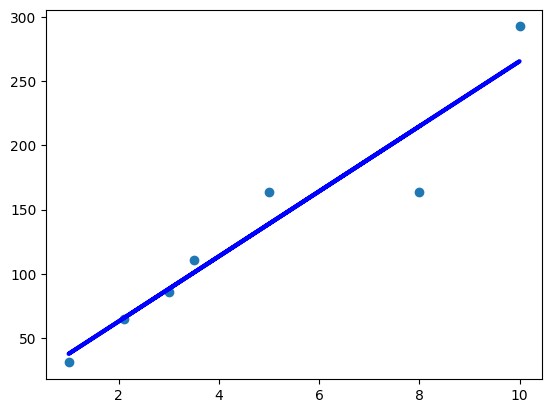

[189.55106566 316.14785212]
The score of this line for the data:  0.9084260459892224


In [20]:
#선형회귀 모델 생성
regr_2 = linear_model.LinearRegression()

#샘플데이터 선형회귀에 적용
X = [[2.1], [10], [3], [1], [3.5], [5], [8]] #키 데이터
y = [64.9, 292.6, 85.9, 30.92, 110.5, 163.4, 163.4] #몸무게 데이터
regr_2.fit(X, y)

#그래프 생성
plt.scatter(X, y)
y_pred = regr_2.predict(X)
plt.plot(X, y_pred, color = 'blue', linewidth = 3)
plt.show()

#예측하기
input_data = [[7], [12]] #새로 예측해 볼 데이터
result = regr_2.predict(input_data)
print(result)

#예측정도 확인
score = regr_2.score(X, y)
print("The score of this line for the data: ", score)

결정트리 예측모델

In [24]:
#샘플데이터 생성
parents_height = [[180,165],[175, 160],[180,172],[165,160],[171,152]]
child_height = [3,2,2,1,1]

#사이킷런 결정트리 모델 생성
from sklearn import tree
dt_model = tree.DecisionTreeClassifier()

#데이터 적용
dt_model.fit(parents_height, child_height)

#예측하기
dt_pred=dt_model.predict([[175,153]])
dt_pred

array([2])

분류모델 생성

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


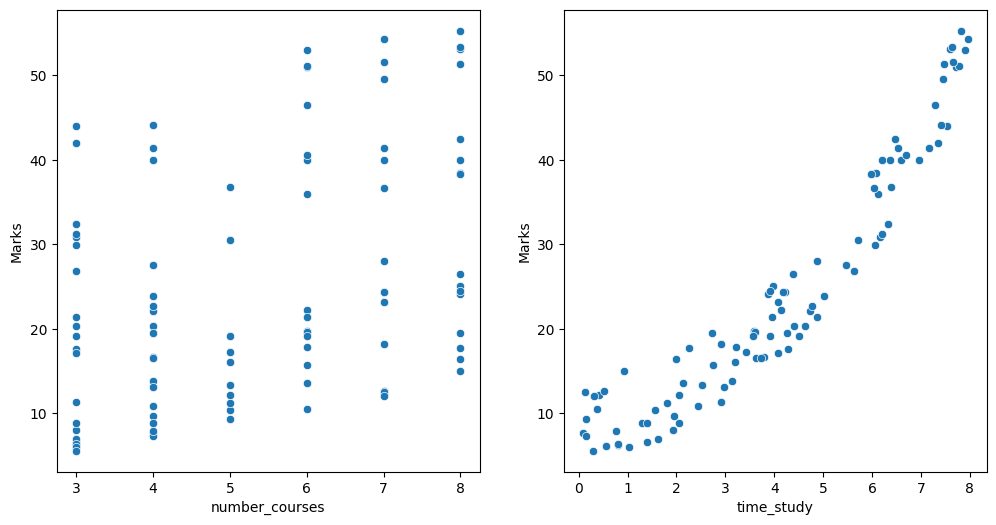

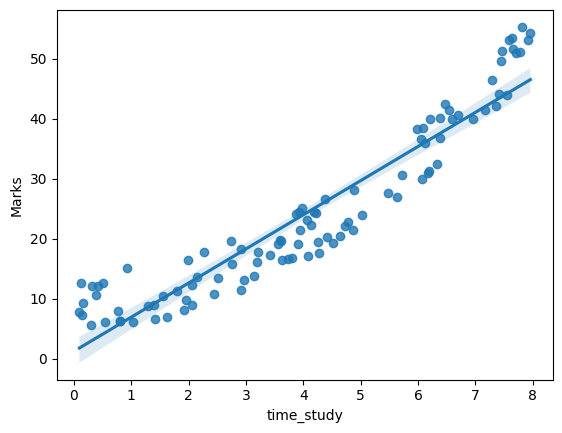

In [39]:
import pandas as pd
std_df = pd.read_csv('Student_Marks.csv')

#통계치, 속성
std_df.describe()
std_df.info()

#속성간 상관관계
std_df.corr()

#산점도 표현
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax=plt.subplots(ncols=2, figsize=(12,6))
sns.scatterplot(data=std_df, x='number_courses',y='Marks', ax=ax[0])
sns.scatterplot(data=std_df, x='time_study',y='Marks', ax=ax[1])
plt.show()

#데이터 셋을 훈련(train) 셋과 테스트(test) 셋으로 분할
from sklearn.model_selection import train_test_split
x=std_df.drop('Marks',axis=1)
y=std_df['Marks']
X_train, X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#선형회귀 알고리즘 모델 생성
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

#학습하기
lr_model.fit(X_train,Y_train)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#모델을 평가하기
lr_pred=lr_model.predict(X_test)

#성능 평가 지표
r2_score(lr_pred, Y_test)
mean_squared_error(lr_pred,Y_test)

#시각화
sns.regplot(x=std_df['time_study'],y=std_df['Marks'])
plt.show()